# Exploration base Prophet

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
df = pd.read_csv('../raw_data/stock_prices_latest.csv', nrows=100000)

In [3]:
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.7500,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.8500,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.1700,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.5600,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.5100,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
99995,ACIW,2012-10-02,41.20,42.20,41.1700,42.20,14.0667,385000,1.0
99996,ACIW,2010-06-10,18.60,19.15,18.4906,19.13,6.3767,183200,1.0
99997,ACIW,2000-07-26,18.31,19.00,18.0000,18.69,6.2300,148600,1.0
99998,ACIW,2013-06-26,45.58,45.78,44.9300,45.01,15.0033,192700,1.0


In [4]:
is_MSFT = df['symbol']=='MSFT'
df_msft = df[is_MSFT]

In [5]:
df2 = df_msft[['date', 'close_adjusted']].copy()
df2

,date,close_adjusted
0,2016-05-16,49.7013
1,2002-01-16,22.5902
2,2001-09-18,18.0802
3,2007-10-26,27.2232
4,2014-06-27,38.6773
...,...,...
4539,2017-10-24,78.4629
4540,2001-02-01,20.7629
4541,2011-02-01,23.2219
4542,2016-03-30,52.7890


In [6]:
df2.columns = ['ds','y']
df2['ds'] = pd.to_datetime(df2['ds'])
df2.sort_values(by=['ds'], inplace=True)
df2.head()

,ds,y
604,2000-01-03,38.7965
2681,2000-01-04,37.4851
1192,2000-01-05,37.8812
3000,2000-01-06,36.6130
1050,2000-01-07,37.0923


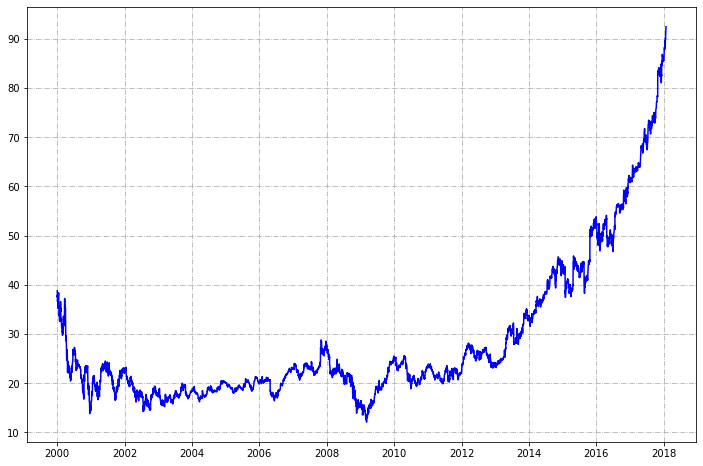

In [7]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df2['ds'], df2['y'], 'b')
plt.show()

## Premier modèle sur toutes les données microsoft

In [8]:
model = NeuralProphet()
metrics = model.fit(df2, validate_each_epoch=True, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 17


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[17/17]: 100%|██████████| 17/17 [00:03<00:00,  5.23it/s, SmoothL1Loss=0.00814, MAE=1.84, RegLoss=0, MAE_val=17, SmoothL1Loss_val=0.441]  


In [9]:
future = model.make_future_dataframe(df2, periods=7, n_historic_predictions=len(df2))

forecast = model.predict(future)

Text(0.5, 1.0, 'Microsft Stocks')

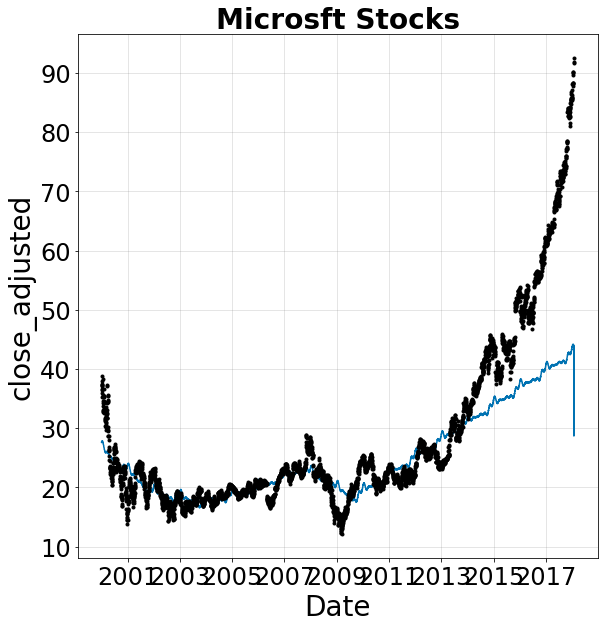

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
model.plot(forecast, xlabel="Date", ylabel="close_adjusted", ax=ax)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Microsft Stocks", fontsize=28, fontweight="bold")

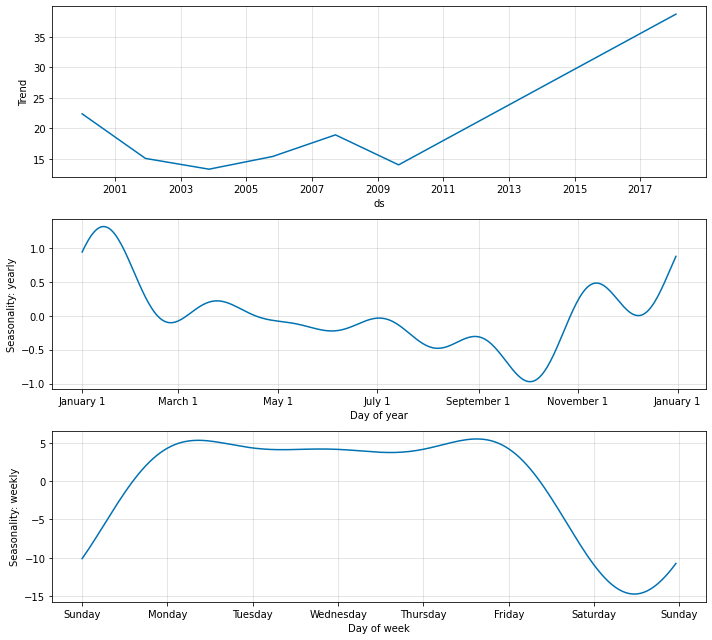

In [11]:
fig_comp = model.plot_components(forecast)

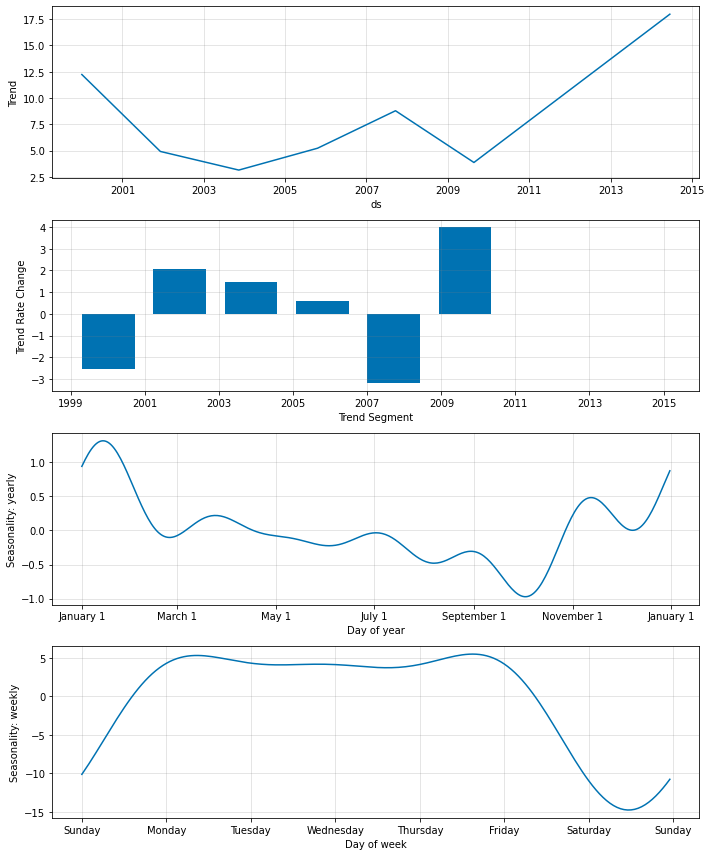

In [12]:
fig_param = model.plot_parameters()

Text(0.5, 1.0, 'Model Loss (MAE)')

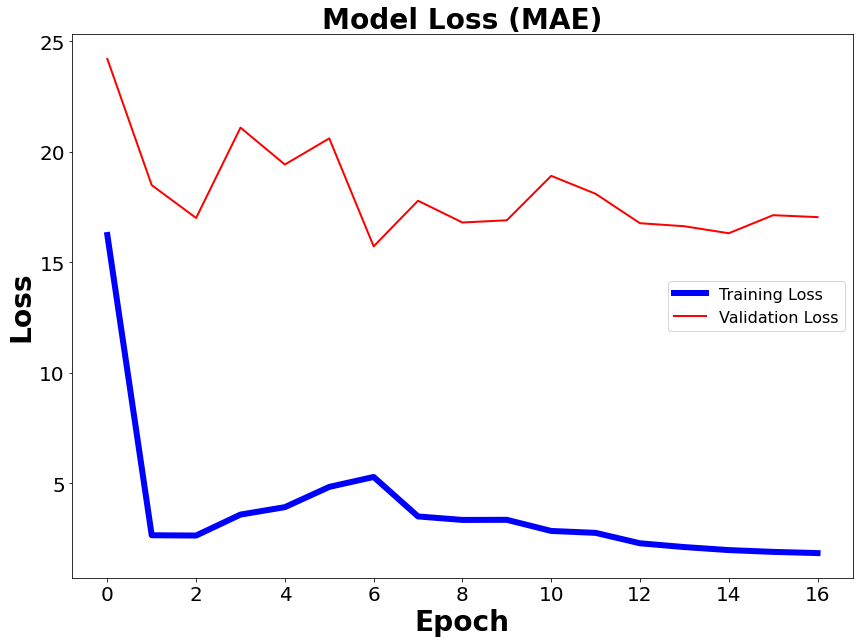

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")

## Analyse 2016-2018

In [14]:
df2

,ds,y
604,2000-01-03,38.7965
2681,2000-01-04,37.4851
1192,2000-01-05,37.8812
3000,2000-01-06,36.6130
1050,2000-01-07,37.0923
...,...,...
575,2018-01-18,90.1000
904,2018-01-19,90.0000
2740,2018-01-22,91.6100
3647,2018-01-23,91.9000


In [15]:
df3 = df2[(df2['ds'] > '2016-01-01') & (df2['ds'] < '2018-01-01')]
df3

,ds,y
3457,2016-01-04,52.1816
2472,2016-01-05,52.4197
1106,2016-01-06,51.4674
4092,2016-01-07,49.6773
2140,2016-01-08,49.8296
...,...,...
3473,2017-12-22,85.5100
2167,2017-12-26,85.4000
22,2017-12-27,85.7100
564,2017-12-28,85.7200


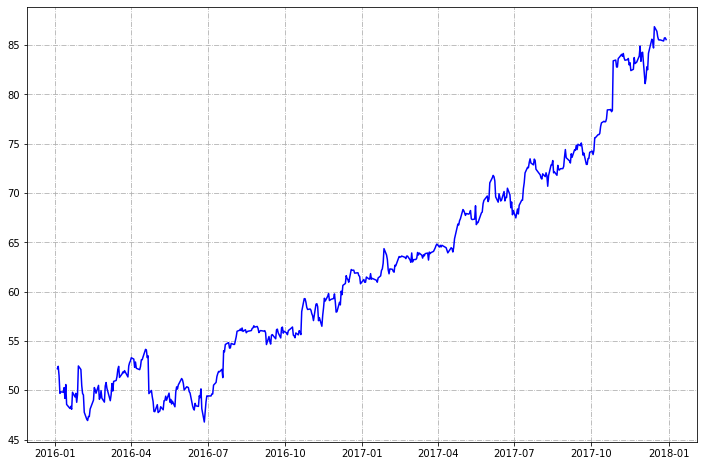

In [16]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df3['ds'], df3['y'], 'b')
plt.show()

In [17]:
model = NeuralProphet()
metrics = model.fit(df3, validate_each_epoch=True, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 79


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[79/79]: 100%|██████████| 79/79 [00:04<00:00, 16.27it/s, SmoothL1Loss=0.00109, MAE=1.05, RegLoss=0, MAE_val=3.07, SmoothL1Loss_val=0.0104] 


In [18]:
future = model.make_future_dataframe(df3, periods=7, n_historic_predictions=len(df3))

forecast = model.predict(future)

Text(0.5, 1.0, 'Microsft Stocks')

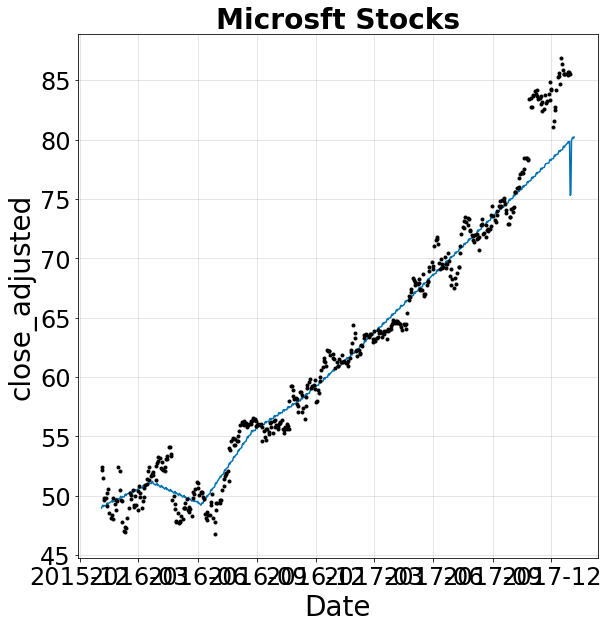

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
model.plot(forecast, xlabel="Date", ylabel="close_adjusted", ax=ax)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Microsft Stocks", fontsize=28, fontweight="bold")

Text(0.5, 1.0, 'Model Loss (MAE)')

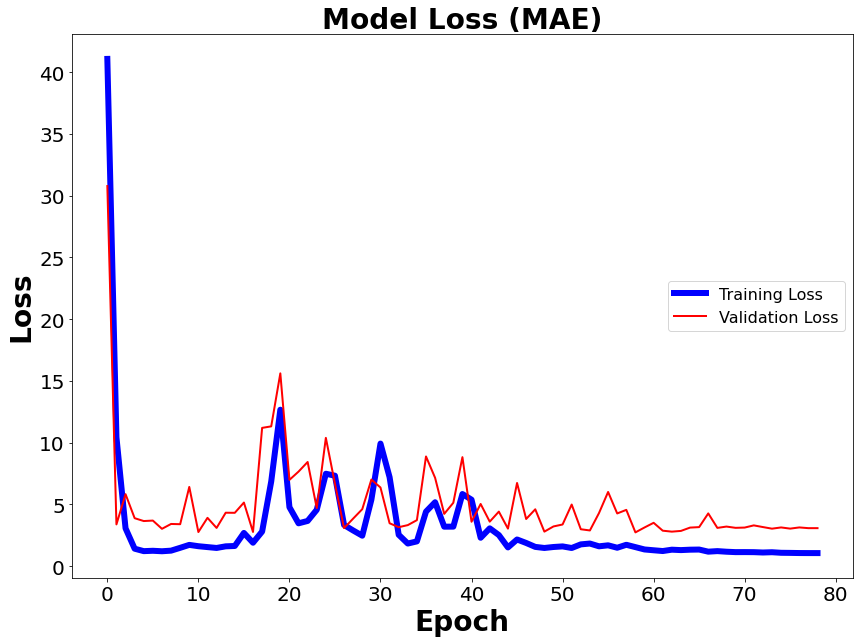

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")

# Test ARIMA

In [21]:
df_msft

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.8300,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.8700,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.3200,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.0300,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.2500,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
4539,MSFT,2017-10-24,78.90,79.20,78.46,78.8600,78.4629,16613928,1.0
4540,MSFT,2001-02-01,60.81,62.63,60.38,62.3800,20.7629,35896400,1.0
4541,MSFT,2011-02-01,27.80,28.06,27.61,27.9925,23.2219,62810700,1.0
4542,MSFT,2016-03-30,54.93,55.64,54.90,55.0500,52.7890,23008260,1.0


In [22]:
df_msft = df_msft.set_index('date')

In [23]:
df_msft

,symbol,open,high,low,close,close_adjusted,volume,split_coefficient
date,,,,,,,,
2016-05-16,MSFT,50.80,51.96,50.75,51.8300,49.7013,20032017,1.0
2002-01-16,MSFT,68.85,69.84,67.85,67.8700,22.5902,30977700,1.0
2001-09-18,MSFT,53.41,55.00,53.17,54.3200,18.0802,41591300,1.0
2007-10-26,MSFT,36.01,36.03,34.56,35.0300,27.2232,288121200,1.0
2014-06-27,MSFT,41.61,42.29,41.51,42.2500,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...
2017-10-24,MSFT,78.90,79.20,78.46,78.8600,78.4629,16613928,1.0
2001-02-01,MSFT,60.81,62.63,60.38,62.3800,20.7629,35896400,1.0
2011-02-01,MSFT,27.80,28.06,27.61,27.9925,23.2219,62810700,1.0


In [24]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544 entries, 2016-05-16 to 2001-07-06
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             4544 non-null   object 
 1   open               4544 non-null   float64
 2   high               4544 non-null   float64
 3   low                4544 non-null   float64
 4   close              4544 non-null   float64
 5   close_adjusted     4544 non-null   float64
 6   volume             4544 non-null   int64  
 7   split_coefficient  4544 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 319.5+ KB


In [25]:
df_msft.sort_index(inplace=True)

In [26]:
df_msft = df_msft[["close_adjusted"]]

<AxesSubplot:xlabel='date'>

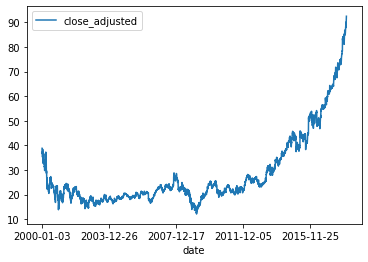

In [27]:
df_msft.plot()

In [28]:
df_msft = df_msft.loc['2017-01-01':'2019-01-01']

In [29]:
df_msft = df_msft.reset_index().drop(columns='date')

In [30]:
y = df_msft.close_adjusted
y

0      61.2191
1      60.9452
2      60.9452
3      61.4735
4      61.2778
        ...   
262    90.1000
263    90.0000
264    91.6100
265    91.9000
266    92.4900
Name: close_adjusted, Length: 267, dtype: float64

In [31]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(y)[1])

p-value:  0.9943814385399473


In [32]:
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  2.6126950594984655e-30


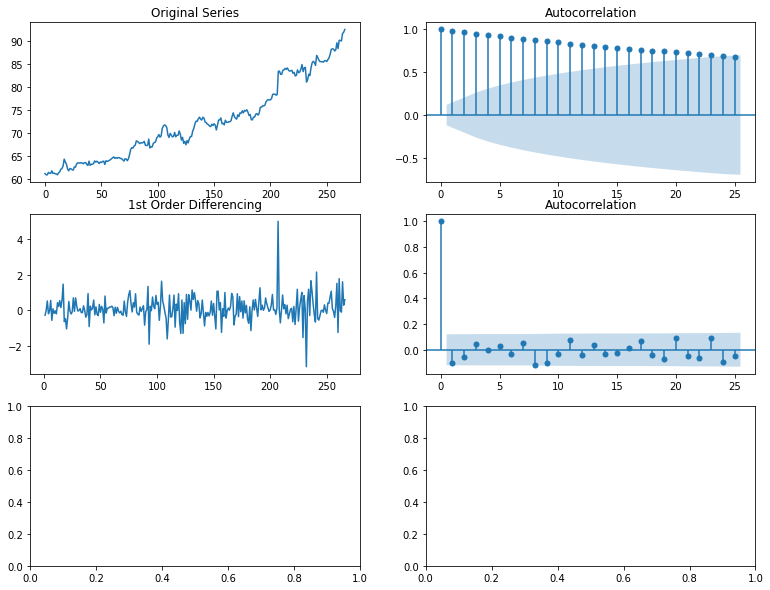

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

plt.show()

In [34]:
y_diff = y.diff().dropna()

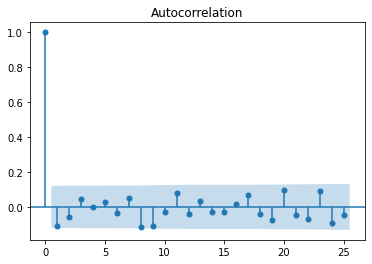

In [35]:
plot_acf(y_diff);

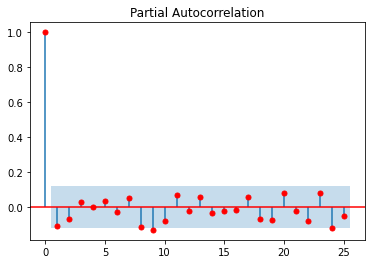

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(y_diff, c='r');

In [37]:
y_diff = pd.DataFrame(y_diff)

In [38]:
y_diff.index = pd.DatetimeIndex(y_diff.index).to_period('D')

In [39]:
y_diff

,close_adjusted
1970-01-01,-0.2739
1970-01-01,0.0000
1970-01-01,0.5283
1970-01-01,-0.1957
1970-01-01,-0.0195
...,...
1970-01-01,-0.0400
1970-01-01,-0.1000
1970-01-01,1.6100
1970-01-01,0.2900


In [40]:
from statsmodels.tsa.arima_model import ARIMA

# 1. initialize the model
arima = ARIMA(y_diff, order=(0, 1, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.close_adjusted   No. Observations:                  265
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -283.183
Method:                       css-mle   S.D. of innovations              0.697
Date:                Thu, 10 Jun 2021   AIC                            572.366
Time:                        09:25:37   BIC                            583.105
Sample:                    01-01-1970   HQIC                           576.681
                         - 01-01-1970                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0008      0.001      1.380      0.168      -0.000       0.002
ma.L1.D.close_adjusted    -1.0000      0.010    -99.570      0.000      -1.020      -0.980
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
import pmdarima as pm

In [42]:
a_model = pm.auto_arima(y,
                       start_p = 0, max_p = 2,
                       start_q = 0, max_q = 2,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=567.802, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=566.761, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=566.370, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=573.237, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=568.061, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=567.807, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=567.165, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=573.605, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.393 seconds


In [43]:
a_model.predict(n_periods=7)

array([92.54605283, 92.66355293, 92.78105302, 92.89855312, 93.01605322,
       93.13355332, 93.25105342])

In [44]:
y_train = y[:260]
y_test = y[260:]
arima = ARIMA(y_train, order=(0, 1, 1)).fit()

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [45]:
(forecast, stderr, conf_int) = arima.forecast(7, alpha=0.05)

In [46]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

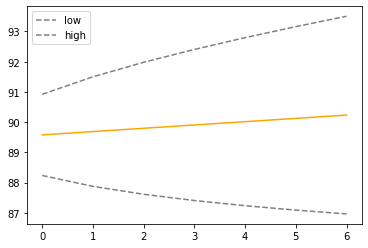

In [47]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

In [48]:
forecast.index = y_test.index
conf_int.index = y_test.index

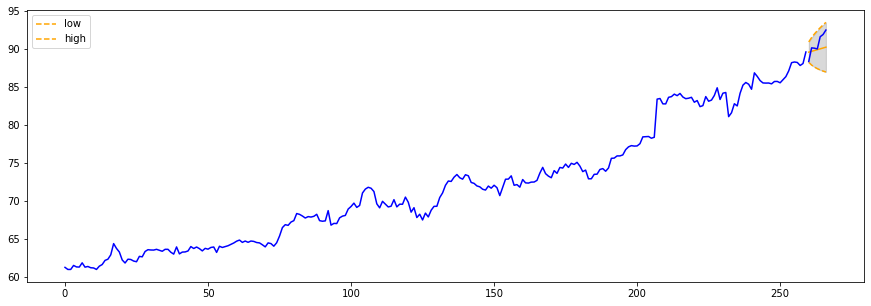

In [49]:
plt.figure(figsize=(15,5))
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')
plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15)

<AxesSubplot:title={'center':'Residuals'}>

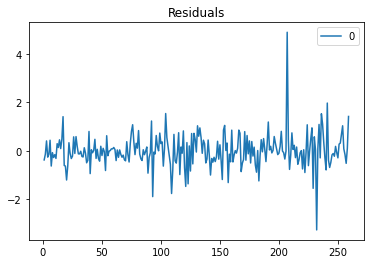

In [50]:
residuals = pd.DataFrame(arima.resid)
residuals.plot(title="Residuals")

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

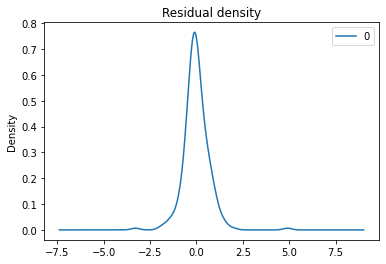

In [51]:
residuals.plot(kind='kde', title='Residual density')

In [52]:
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    maxs = np.amax(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(y_pred-y_true, fft=False)[1]                      # Lag 1 Autocorrelation of Error
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [53]:
forecast_accuracy(forecast, y_test)

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


{'mape': 0.012076878227869155,
 'me': -0.7511925771816854,
 'mae': 1.1017346504281684,
 'mpe': -0.008109226012289267,
 'rmse': 1.3425550666855592,
 'acf1': 0.3313726571246982,
 'corr': 0.9462923274857963,
 'minmax': 0.01204970659228799}

In [54]:
import pmdarima as pm

model = pm.auto_arima(y_train, 
                      start_p=0, max_p=3,
                      start_q=0, max_q=3, 
                      d=None,           # let model determine 'd'
                      test='adf',       # using adftest to find optimal 'd'
                      trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=545.003, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545.439, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=545.132, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=549.498, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=544.625, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=547.516, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=546.190, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=545.681, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=545.523, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=549.452, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=552.536, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.838 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  260
Model: 

In [55]:
y_pred = model.predict(n_periods=7)
y_pred

array([89.55654384, 89.53254509, 89.52548301, 89.53316345, 89.55367649,
       89.58535965, 89.62676584])

In [56]:
y.tail(7)

260    88.35
261    90.14
262    90.10
263    90.00
264    91.61
265    91.90
266    92.49
Name: close_adjusted, dtype: float64

In [57]:
y_train

0      61.2191
1      60.9452
2      60.9452
3      61.4735
4      61.2778
        ...   
255    88.2800
256    88.2200
257    87.8200
258    88.0800
259    89.6000
Name: close_adjusted, Length: 260, dtype: float64

In [58]:
print('p-value: ', adfuller(y)[1])

p-value:  0.9943814385399473


In [64]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
import itertools

range_p = [0,1,2]
range_d = [1]
range_q = [0,1,2]
grid = itertools.product(range_p, range_d, range_q)
orders = []
r2s = []
aics = []
fold_idxs = []
for (p,d,q) in grid:
    order = (p,d,q)
    folds = TimeSeriesSplit(n_splits=3)
    for fold_idx, (train_idx, test_idx) in enumerate(folds.split(y)):
        fold_idxs.append(fold_idx)
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = ARIMA(y_train, order=order).fit()
        # y_pred = model.forecast(len(y_test))[0] for unknown reason this crash
        # r2s.append(r2_score(y_pred, y_true))
        orders.append(order)
        aics.append(model.aic)
        
        
results = pd.DataFrame(list(zip(fold_idxs, orders, aics)),#, r2s)), 
                   columns =['Fold', '(p,d,q)', 'AIC'])#, 'R2'])

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

In [65]:
results

,Fold,"(p,d,q)",AIC
0,0,"(0, 1, 0)",77.185793
1,1,"(0, 1, 0)",232.701828
2,2,"(0, 1, 0)",338.760260
3,0,"(0, 1, 1)",77.824317
4,1,"(0, 1, 1)",233.846579
5,2,"(0, 1, 1)",339.388534
6,0,"(0, 1, 2)",79.813031
7,1,"(0, 1, 2)",234.957243
8,2,"(0, 1, 2)",340.958022
9,0,"(1, 1, 0)",77.801498


In [66]:
results.sort_values('AIC').groupby('(p,d,q)').mean()['AIC'].sort_values()

(p,d,q)
(0, 1, 0)    216.215960
(1, 1, 0)    216.915726
(0, 1, 1)    217.019810
(1, 1, 1)    218.294818
(2, 1, 0)    218.384585
(2, 1, 1)    218.449830
(0, 1, 2)    218.576099
(2, 1, 2)    218.740551
(1, 1, 2)    220.079821
Name: AIC, dtype: float64